# Problem Statement:
`You are the data scientist at a medical research facility. The facility wants you to build a machine learning model to classify if the given data of a patient should tell if the patient is at the risk of a heart attack.`

## Heart Disease Dataset:

#### Domian:
**Healthcare**    

 **Tasks To Be Performed:**

**1. Data Analysis:**

 a. Import the dataset

 b. Get information about the dataset (mean, max, min, quartiles etc.)

 c. Find the correlation between all fields

In [1]:
import numpy as np
import pandas as pd

In [2]:
data =pd.read_csv("dataset.csv")
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
## Get the info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
## Check the missing value
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
# Get descriptive statistics for numerical columns
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
## correlation between all fields
correlation_matrix =data.corr()
correlation_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


# 2. Data Visualization:
 a. Visualize the number of patients having a heart disease and not having a heart disease

 b. Visualize the age and whether a patient has disease or not

 c. Visualize correlation between all features using a heat map

/tmp/ipython-input-4213054958.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target',data=data,palette='Set1')


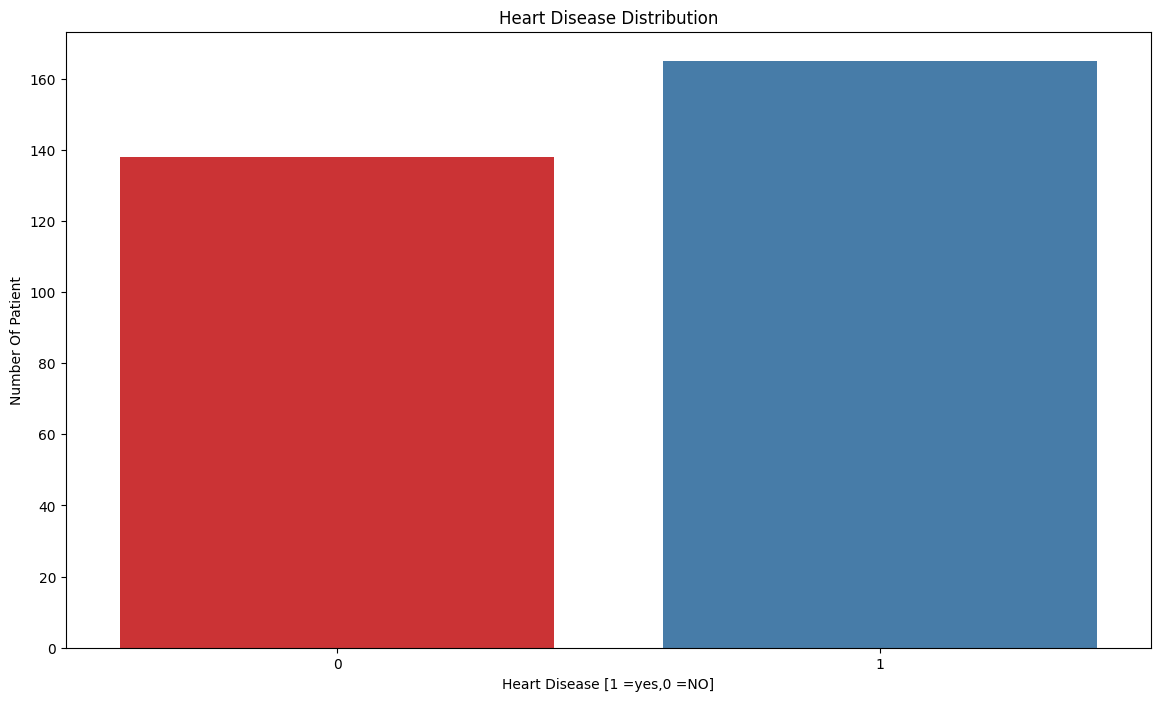

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(14,8))
sns.countplot(x='target',data=data,palette='Set1')
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease [1 =yes,0 =NO]")
plt.ylabel("Number Of Patient")
plt.show()

/tmp/ipython-input-2921177401.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target',y='age',data=data,palette='Set1')


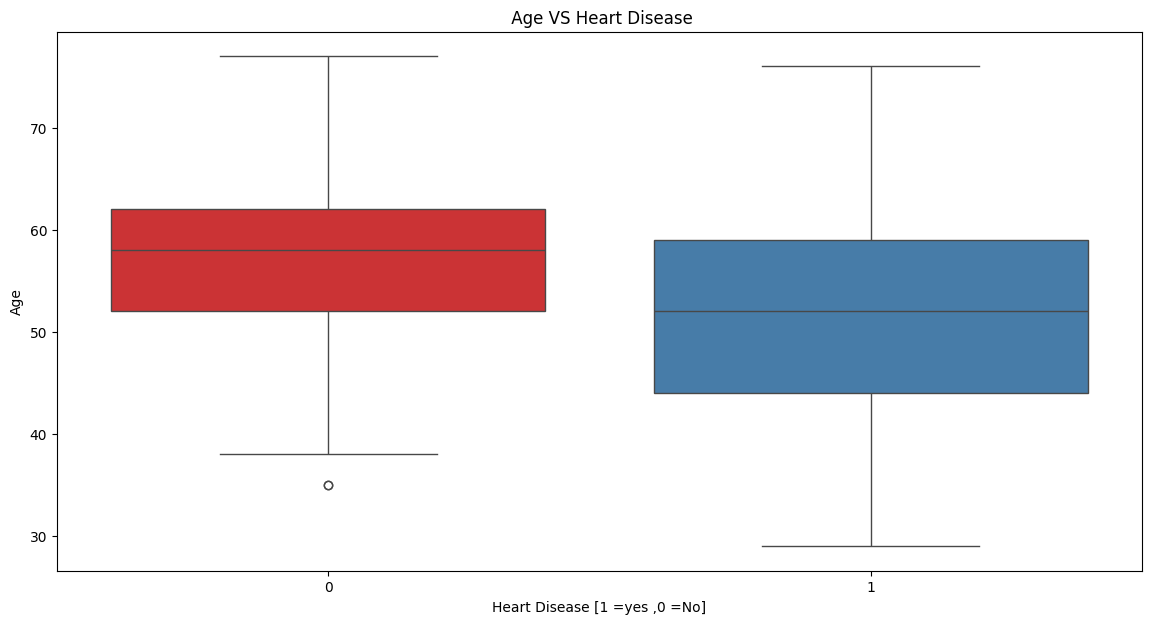

In [8]:
## box plot
plt.subplots(figsize=(14,7))
sns.boxplot(x='target',y='age',data=data,palette='Set1')
plt.title(" Age VS Heart Disease")
plt.xlabel("Heart Disease [1 =yes ,0 =No]")
plt.ylabel("Age")
plt.show()

/tmp/ipython-input-2807110788.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='target', y='age', jitter=True,data=data, palette='Set1')


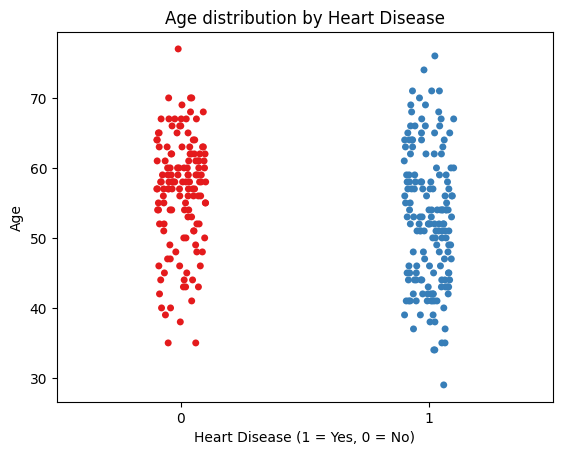

In [9]:
# OR using stripplot
sns.stripplot(x='target', y='age', jitter=True,data=data, palette='Set1')
plt.title('Age distribution by Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

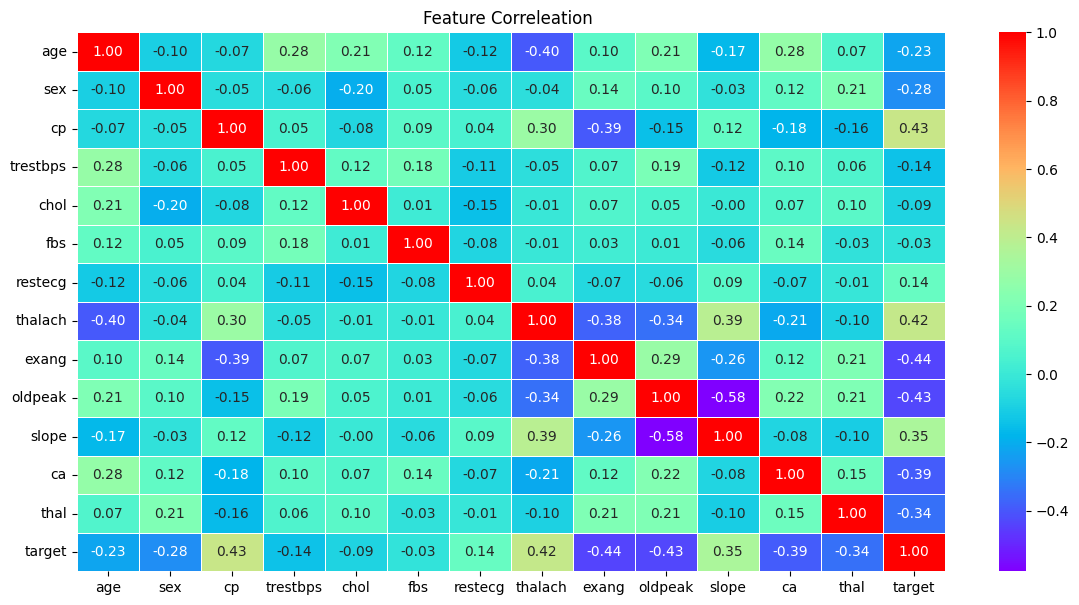

In [10]:
## correlation between all feature using a heat map

corr_mat =data.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,7))
sns.heatmap(corr_mat,annot=True,cmap='rainbow',fmt='.2f',linewidth=0.6)
plt.title("Feature Correleation ")
plt.show()

# 3. Logistic Regression
**A -Build a simple logistic regression model:**

 i. Divide the dataset in 70:30 ratio

 ii. Build the model on train set and predict the values on test set

 iii. Build the confusion matrix and get the accuracy score

In [11]:
## Divide the dataset into train and test sets (70:30)
X =data.drop(columns=['target']) ## independent Variable
y =data['target'] ## dependent variable

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.30,random_state=42)

In [12]:
## Build the model
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()
lr.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
##Predict on the test data
y_pred =lr.predict(X_test)


Confusion Matrix:[[32  9]
 [ 8 42]]


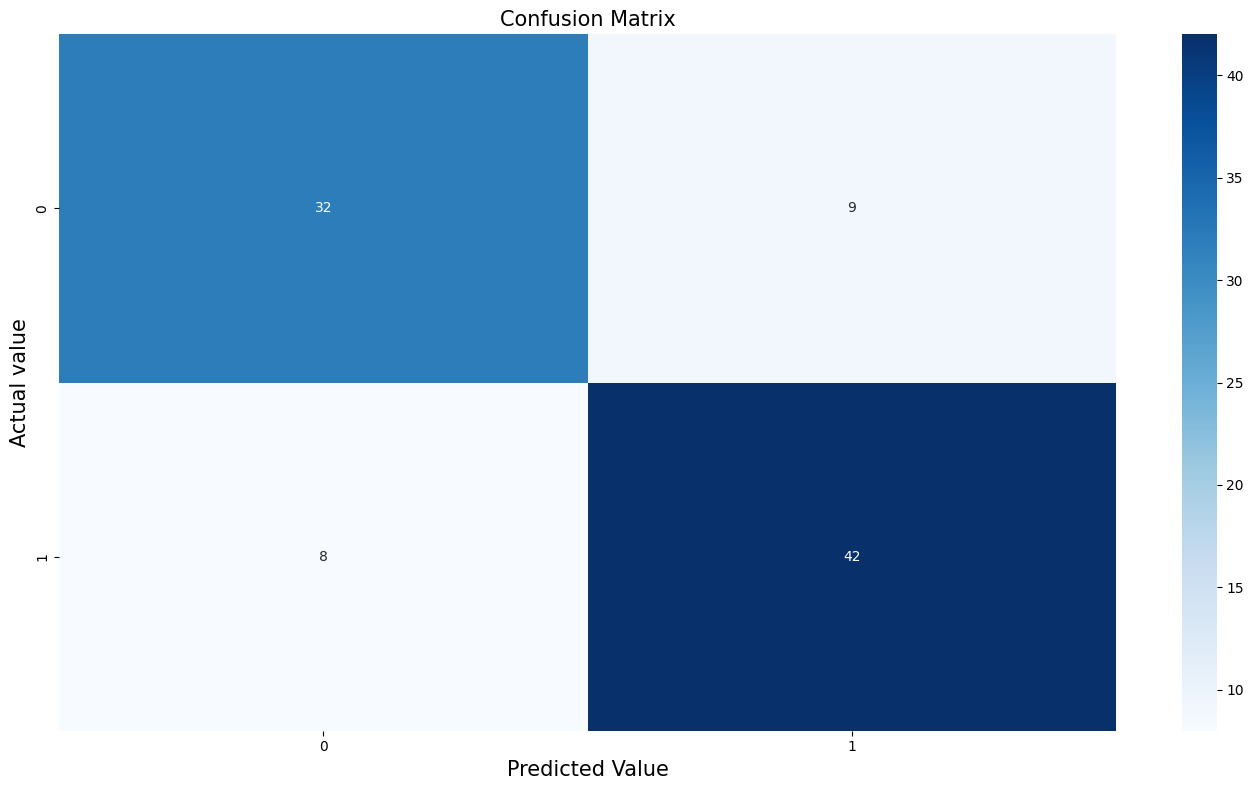

Accuracy On The LinearRegression Model Is:81.31868131868131


In [14]:
## confusion matrix and accuracy

from sklearn.metrics import confusion_matrix,accuracy_score

cm =confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix:{cm}')

plt.subplots(figsize=(14,8))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("Actual value",fontsize=15)
plt.tight_layout()
plt.show()

## Accuracy score
accuracy =accuracy_score(y_test,y_pred)
print(f'Accuracy On The LinearRegression Model Is:{accuracy*100}')

## 4. Decision Tree:
 **A. Build a decision tree model:**
     
 i. Divide the dataset in 70:30 ratio

 ii. Build the model on train set and predict the values on test set

 iii. Build the confusion matrix and calculate the accuracy

 iv. Visualize the decision tree using the Graphviz package

In [15]:
## Divide the dataset into train and test sets (70:30)
X =data.drop(columns=['target']) ## independent variable
y =data['target'] ## Dependent variable

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.30,random_state=42)

In [16]:
## build the model
from sklearn.tree import DecisionTreeClassifier
dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [17]:
## Predict on the test data
y_pred =dt.predict(X_test)

Confusion Matrix:[[31 10]
 [16 34]]


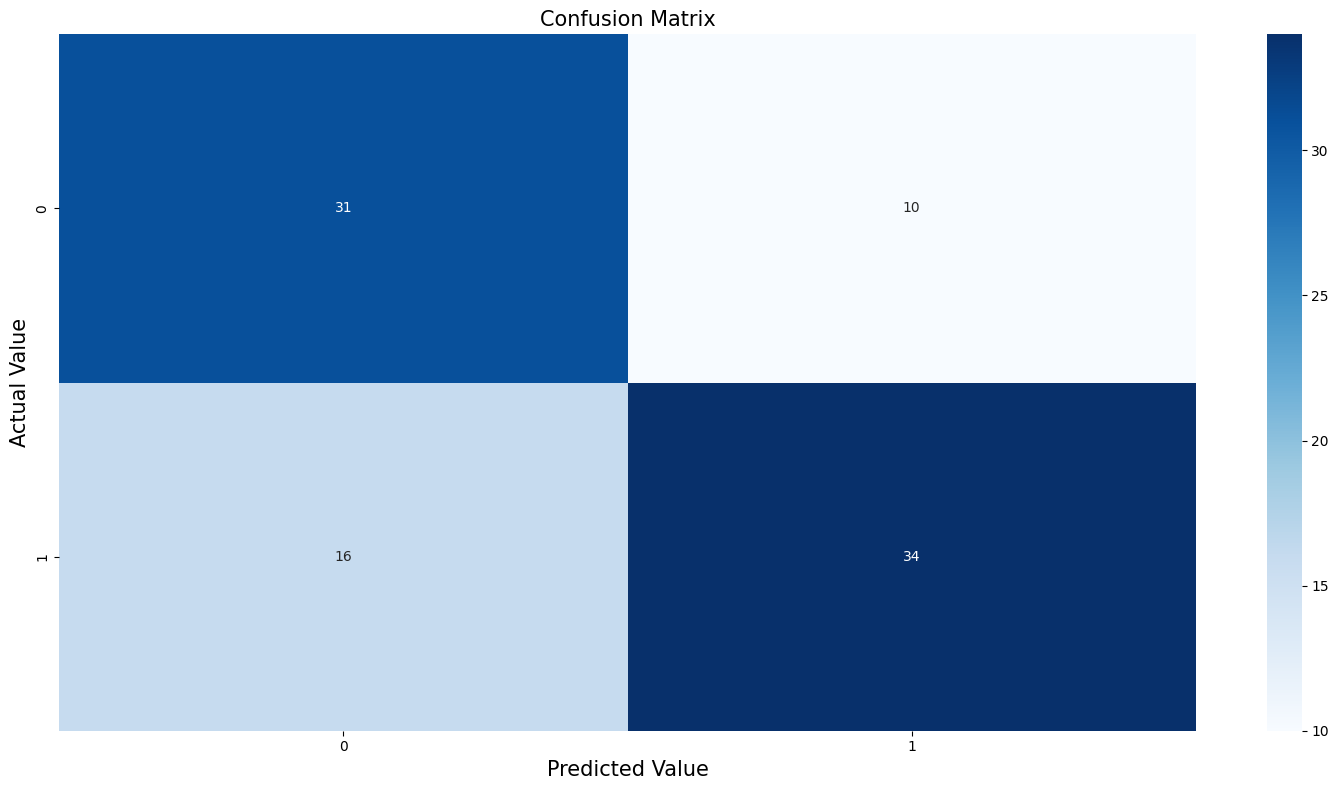

Accuracy On The DecisionTreeClassifier Is:71.42857142857143


In [18]:
## confusion matrix and accuracy

from sklearn.metrics import confusion_matrix,accuracy_score

cm =confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix:{cm}')

plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("Actual Value",fontsize=15)
plt.tight_layout()
plt.show()

## accuracy
accuracy =accuracy_score(y_test,y_pred)
print(f'Accuracy On The DecisionTreeClassifier Is:{accuracy*100}')

In [19]:
accuracy =accuracy_score(y_pred,y_test)
print(f'Accuracy On The DecisionTreeClassifier Is:{accuracy}')

Accuracy On The DecisionTreeClassifier Is:0.7142857142857143


In [20]:
#pip install graphviz

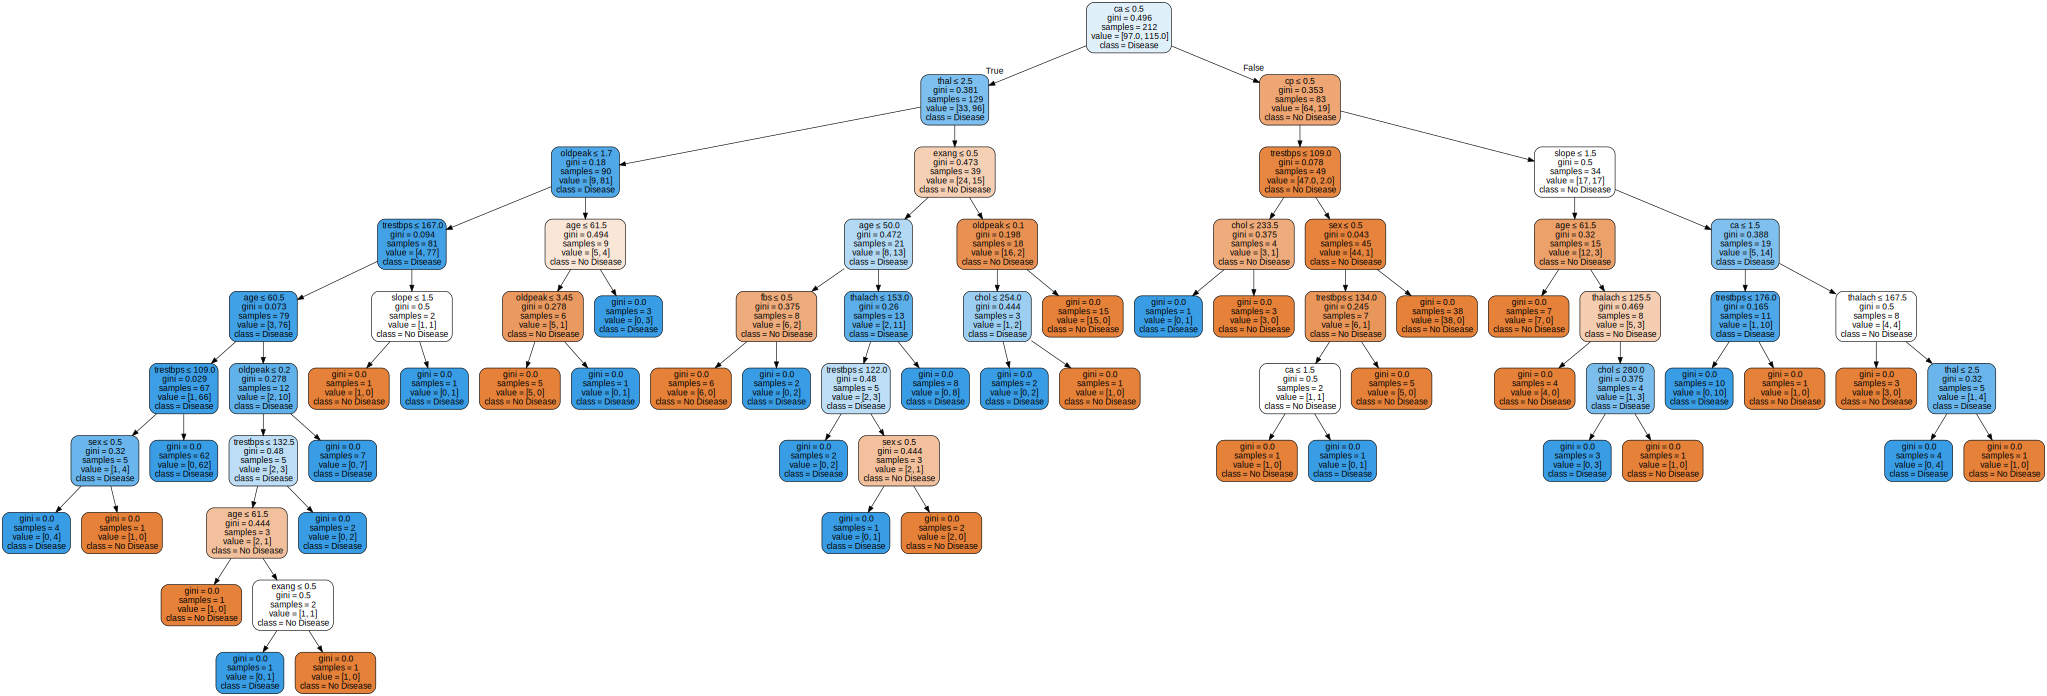

In [21]:
# Visualize the decision tree using the Graphviz package
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

grap =export_graphviz(dt,out_file=None,feature_names=X.columns,
                      class_names=['No Disease','Disease'],
                      filled=True,rounded=True,
                      special_characters=True)

##visualize using graphviz
graph = graphviz.Source(grap)
graph.render("Heart Disease Tree",format ='png',cleanup=True) ##save the png
graph


# 5. Random Forest:
**A. Build a Random Forest model:**

 i. Divide the dataset in 70:30 ratio

 ii. Build the model on train set and predict the values on test set

 iii. Build the confusion matrix and calculate the accuracy

 iv. Visualize the model using the Graphviz package

In [22]:
## Divide the dataset into train and test sets (70:30)
X =data.drop(columns=['target']) ## independent variable
y =data['target'] ## dependent variable

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.30,random_state=42)

In [23]:
## build the model
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [24]:
## Predict on the test data
y_pred =rf.predict(X_test)

Confusion Matrix:[[33  8]
 [ 8 42]]
//////////////////////////////////
---------------------------------
//////////////////////////////////
Accuracy On Random Forest Model Is:82.41758241758241


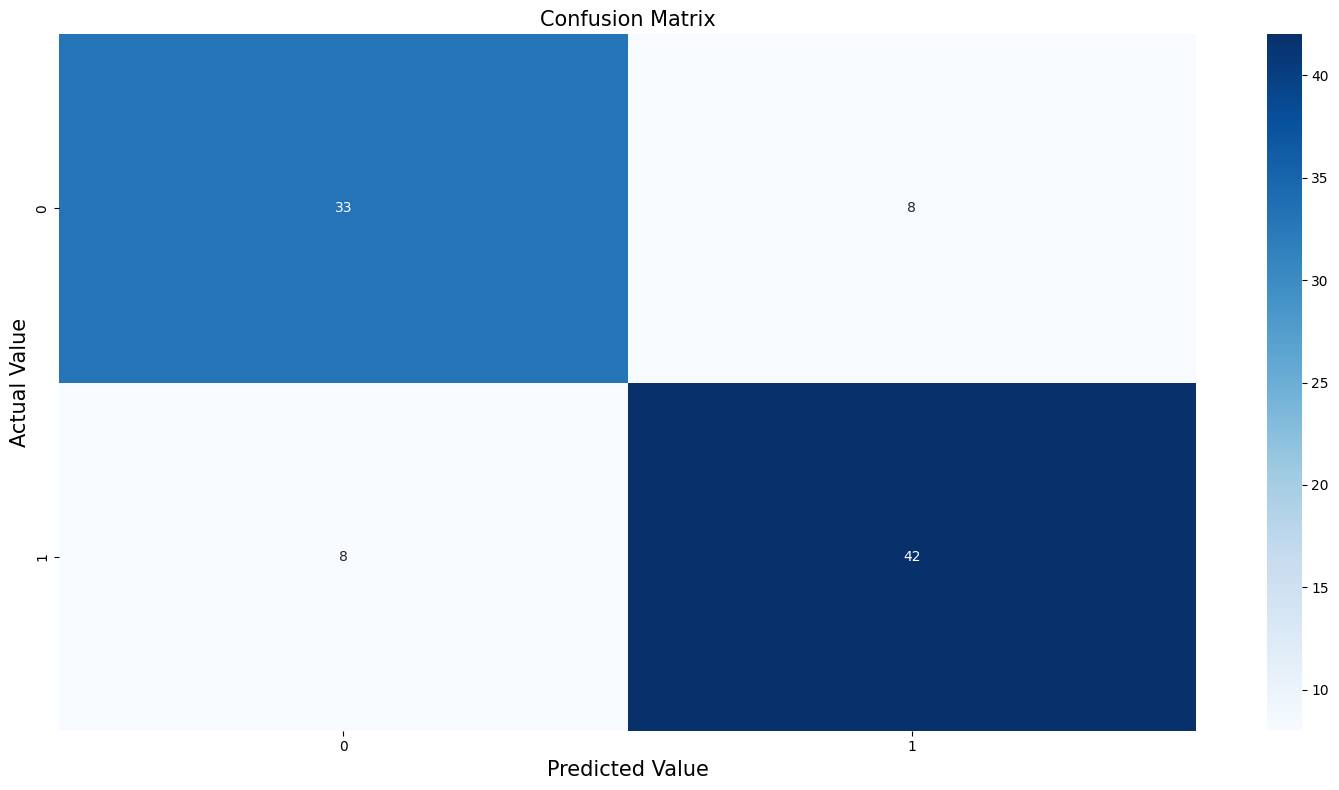

In [25]:
## confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score

cm =confusion_matrix(y_test,y_pred)
print(f'Confusion Matrix:{cm}')

print('//////////////////////////////////')
print('---------------------------------')
print('//////////////////////////////////')
## Accuracy score
accuracy =accuracy_score(y_test,y_pred)
print(f'Accuracy On Random Forest Model Is:{accuracy*100}')

plt.subplots(figsize=(15,8))
sns.heatmap(cm,annot=True,cmap='Blues')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted Value",fontsize=15)
plt.ylabel("Actual Value",fontsize=15)
plt.tight_layout()
plt.show()

# 6. Select the best model

 a. Print the confusion matrix of all classifiers

 b. Print the classification report of all classifiers

 c. Calculate Recall Precision and F1 score of all the models

 d. Visualize confusion matrix using heatmaps

 e. Select the best model based on the best accuracies

In [26]:
X =data.drop(columns=['target'],axis=1) ## independent variable
y =data['target'] ## Dependent variable

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=.30,random_state=42)

In [27]:
## import classifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
## Define the model
models ={
    'Logistic Regression':LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine':SVC()
}


:Logistic Regression
Confusion Matrix:
[[32  9]
 [ 8 42]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



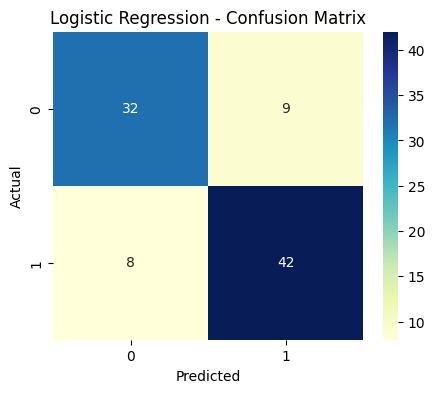


:Decision Tree
Confusion Matrix:
[[32  9]
 [15 35]]
Classification Report
              precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91



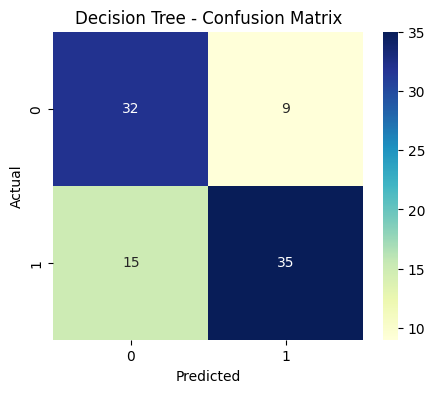


:Random Forest
Confusion Matrix:
[[33  8]
 [ 8 42]]
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



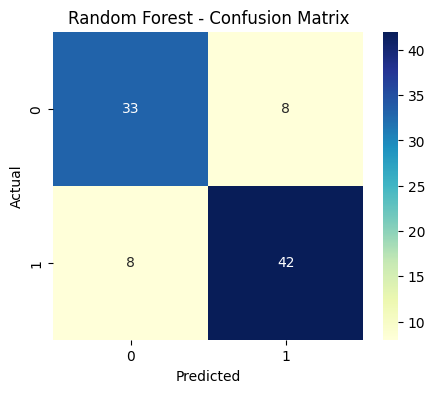


:Support Vector Machine
Confusion Matrix:
[[19 22]
 [ 5 45]]
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.46      0.58        41
           1       0.67      0.90      0.77        50

    accuracy                           0.70        91
   macro avg       0.73      0.68      0.68        91
weighted avg       0.73      0.70      0.69        91



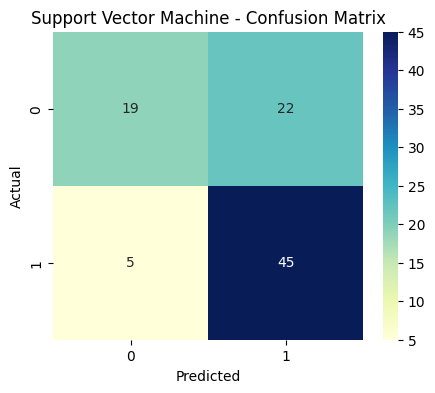

In [29]:
#Train and Predict

result =[]

for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred =model.predict(X_test)

    accuracy=accuracy_score(y_test,y_pred)
    precision =precision_score(y_test,y_pred)
    recall =recall_score(y_test,y_pred)
    f1 =f1_score(y_test,y_pred)
    conf =confusion_matrix(y_test,y_pred)

    print(f"\n:{name}")
    print("Confusion Matrix:")
    print(conf)
    print("Classification Report")
    print(classification_report(y_test,y_pred))

    # Store results
    result.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Confusion Matrix": conf
    })

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [30]:
# Convert to DataFrame for comparison
results_df = pd.DataFrame(result).drop(columns=["Confusion Matrix"])
print("\n Model Comparison:")
print(results_df.sort_values(by="Accuracy", ascending=False))


 Model Comparison:
                    Model  Accuracy  Precision  Recall  F1 Score
2           Random Forest  0.824176   0.840000    0.84  0.840000
0     Logistic Regression  0.813187   0.823529    0.84  0.831683
1           Decision Tree  0.736264   0.795455    0.70  0.744681
3  Support Vector Machine  0.703297   0.671642    0.90  0.769231


In [31]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.813187,0.823529,0.84,0.831683
1,Decision Tree,0.736264,0.795455,0.70,0.744681
2,Random Forest,0.824176,0.840000,0.84,0.840000
3,Support Vector Machine,0.703297,0.671642,0.90,0.769231
